In [20]:
# 한글 폰트 설정 => 폰트메니저 모듈
from matplotlib import font_manager as fm,rc
# 적용할 이름
FONT_FILE=r'C:\Windows\Fonts\malgun.ttf'
# 폰트 패밀리 이름 가져오기
font_name=fm.FontProperties(fname=FONT_FILE).get_name()
# 새로운 폰트 패밀리 이름 지정
rc('font',family=font_name)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
F_DATA=r'C:\KDT-2024\PANDAS\WORK\시군구 성별 연령별 주요 정실질환 통계 2018~2022.csv'
dataDF=pd.read_csv(F_DATA,encoding='cp949')
dataDF

,진료년도,상별구분,시도,시군구,성별,연령구분,환자수,입내원일수,요양급여비용
0,2018,ADHD,서울,강남구,남,0~9세,437,3330,188836790
1,2018,ADHD,서울,강남구,남,10~19세,1111,8869,563498480
2,2018,ADHD,서울,강남구,남,20~29세,456,3485,213248290
3,2018,ADHD,서울,강남구,남,30~39세,174,1357,72761750
4,2018,ADHD,서울,강남구,남,40~49세,55,357,21611080
...,...,...,...,...,...,...,...,...,...
164995,2022,조현병,세종,세종시,여,60~69세,29,597,40381390
164996,2022,조현병,세종,세종시,여,70~79세,13,550,39400730
164997,2022,조현병,세종,세종시,여,80~89세,0,0,0
164998,2022,조현병,세종,세종시,여,90~99세,0,0,0


In [22]:
dataDF.isna().sum()

진료년도      0
상별구분      0
시도        0
시군구       0
성별        0
연령구분      0
환자수       0
입내원일수     0
요양급여비용    0
dtype: int64

In [23]:
dataDF.set_index('상별구분',inplace=True)

In [24]:
dataDF.index.value_counts()

상별구분
ADHD    27500
불면증     27500
불안장애    27500
우울증     27500
조울증     27500
조현병     27500
Name: count, dtype: int64

In [25]:
sleepDF=dataDF.loc['불면증'][['진료년도','환자수']]
sleepDF

,진료년도,환자수
상별구분,,
불면증,2018,0
불면증,2018,93
불면증,2018,845
불면증,2018,1236
불면증,2018,959
...,...,...
불면증,2022,443
불면증,2022,213
불면증,2022,100


In [26]:
year_loc=sleepDF.groupby(['진료년도']).sum()
year_loc

,환자수
진료년도,
2018,643333
2019,682383
2020,704659
2021,741920
2022,777201


In [27]:
ageDF=dataDF.loc['불면증'][['연령구분','환자수']]
ageDF

,연령구분,환자수
상별구분,,
불면증,0~9세,0
불면증,10~19세,93
불면증,20~29세,845
불면증,30~39세,1236
불면증,40~49세,959
...,...,...
불면증,60~69세,443
불면증,70~79세,213
불면증,80~89세,100


In [28]:
ageDF=ageDF.groupby(['연령구분']).sum()
ageDF=ageDF.drop(['100세 이상'])
ageDF

,환자수
연령구분,
0~9세,323
10~19세,15987
20~29세,200619
30~39세,336043
40~49세,493653
50~59세,708529
60~69세,785990
70~79세,636296
80~89세,337290


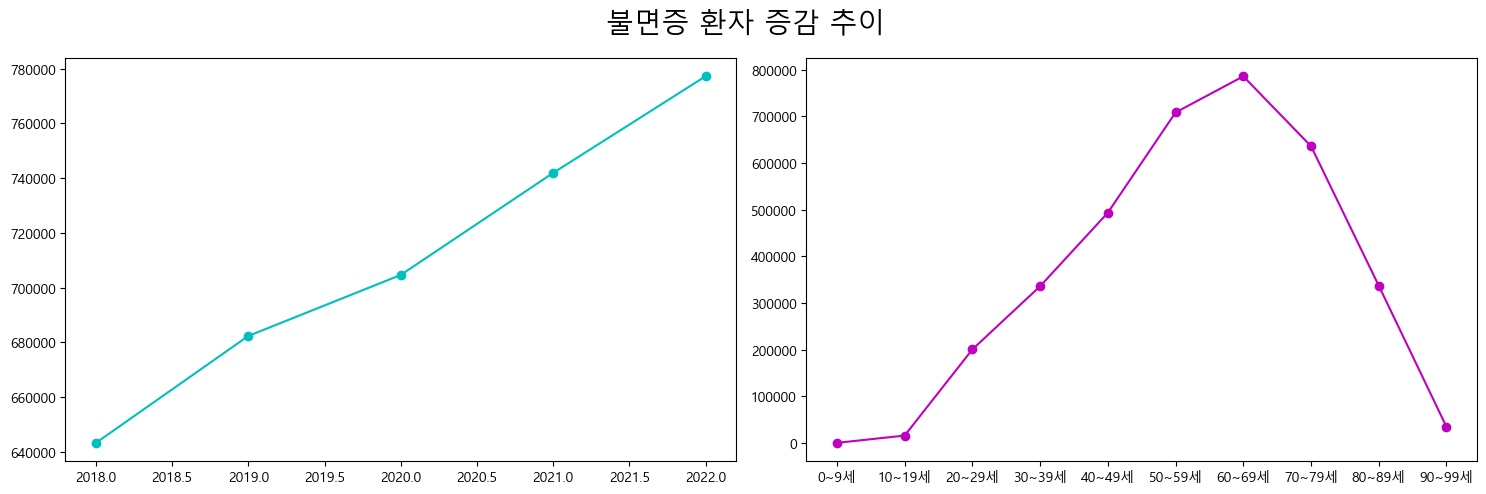

In [42]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(year_loc,'co-')
ax2.plot(ageDF,'mo-')
fig.suptitle('불면증 환자 증감 추이',fontsize=20)
plt.tight_layout()
plt.show()